<a href="https://colab.research.google.com/github/sandra606/StockPrediction/blob/main/NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("nm dataset.csv")
df

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,Company
0,2024-05-02,EQ,1358.00,1377.90,1358.00,1366.60,1362.20,1360.70,1363.91,1697.35,1048.3,6555505,8.941107e+09,"2,43,441",HCLTECH
1,2024-05-03,EQ,1370.00,1370.00,1333.55,1360.70,1347.20,1348.05,1348.33,1697.35,1048.3,5964228,8.041750e+09,"2,35,234",HCLTECH
2,2024-05-06,EQ,1358.00,1365.00,1348.50,1348.05,1360.00,1358.80,1357.74,1697.35,1055.0,2504082,3.399887e+09,99672,HCLTECH
3,2024-05-07,EQ,1347.95,1348.90,1326.15,1358.80,1329.90,1330.95,1333.27,1697.35,1055.0,5096525,6.795023e+09,"1,71,783",HCLTECH
4,2024-05-08,EQ,1330.95,1334.00,1307.30,1330.95,1314.00,1313.65,1315.44,1697.35,1055.0,6832455,8.987696e+09,"1,97,401",HCLTECH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2025-04-24,EQ,244.80,245.15,241.50,243.60,242.70,242.75,243.06,596.00,228.0,23000820,5.590536e+09,"1,28,941",WIPRO
1236,2025-04-25,EQ,243.95,246.15,238.05,242.75,240.50,240.90,241.42,596.00,228.0,16620430,4.012463e+09,"1,11,293",WIPRO
1237,2025-04-28,EQ,240.50,241.95,238.75,240.90,240.70,240.50,240.47,596.00,228.0,14218414,3.419038e+09,85423,WIPRO
1238,2025-04-29,EQ,241.60,243.60,239.85,240.50,241.75,241.40,241.71,596.00,228.0,16647246,4.023826e+09,"1,07,681",WIPRO


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("nm dataset.csv")
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df['No of trades'] = df['No of trades'].str.replace(",", "").astype(int)

df = df.drop(['series', 'Company'], axis=1)
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df = df.drop('Date', axis=1)
df = df.dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)
df_scaled.head()


,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades,day,month,weekday
0,-0.440446,-0.436403,-0.427701,-0.433193,-0.436847,-0.438227,-0.435448,-0.318346,-0.412303,0.303482,0.370052,1.182292,-1.551414,-0.432722,0.681898
1,-0.430390,-0.442962,-0.448367,-0.438138,-0.449423,-0.448832,-0.448505,-0.318346,-0.412303,0.186961,0.208274,1.079684,-1.438617,-0.432722,1.380704
2,-0.440446,-0.447114,-0.435730,-0.448740,-0.438692,-0.439820,-0.440619,-0.318346,-0.405672,-0.494916,-0.626715,-0.615179,-1.100226,-0.432722,-1.414517
3,-0.448868,-0.460482,-0.454621,-0.439730,-0.463927,-0.463167,-0.461126,-0.318346,-0.405672,0.015967,-0.015990,0.286388,-0.987429,-0.432722,-0.715712
4,-0.463114,-0.472854,-0.470554,-0.463071,-0.477257,-0.477671,-0.476069,-0.318346,-0.405672,0.358059,0.378433,0.606677,-0.874632,-0.432722,-0.016907


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("nm dataset.csv")


df.columns = df.columns.str.strip()

target_column = df.columns[-1]
print("Target column assumed as:", target_column)


df.drop_duplicates(inplace=True)

if df[target_column].dtype == "object":
    le = LabelEncoder()
    df[target_column] = le.fit_transform(df[target_column])


non_numeric_cols = df.select_dtypes(exclude=['number']).columns.tolist()

if target_column in non_numeric_cols:
    non_numeric_cols.remove(target_column)


X = df.drop(columns=[target_column] + non_numeric_cols)
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nDecision Tree Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Target column assumed as: Company

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78        52
           1       0.89      0.94      0.91        51
           2       1.00      1.00      1.00        54
           3       0.79      0.84      0.81        44
           4       1.00      1.00      1.00        47

    accuracy                           0.90       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.90      0.90      0.90       248

Accuracy: 0.9032258064516129

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        54
           3       1.00      0.95      0.98        44
           4       1.00      1.00      1.00        47

    accuracy                           0.99       248
   macro avg    

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.1346
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0859
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0846
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0819
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0804
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0836
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 0.0809
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0764
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0806
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0757
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0747
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0678
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0691
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0750
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0745
Epoch 16/20
30/

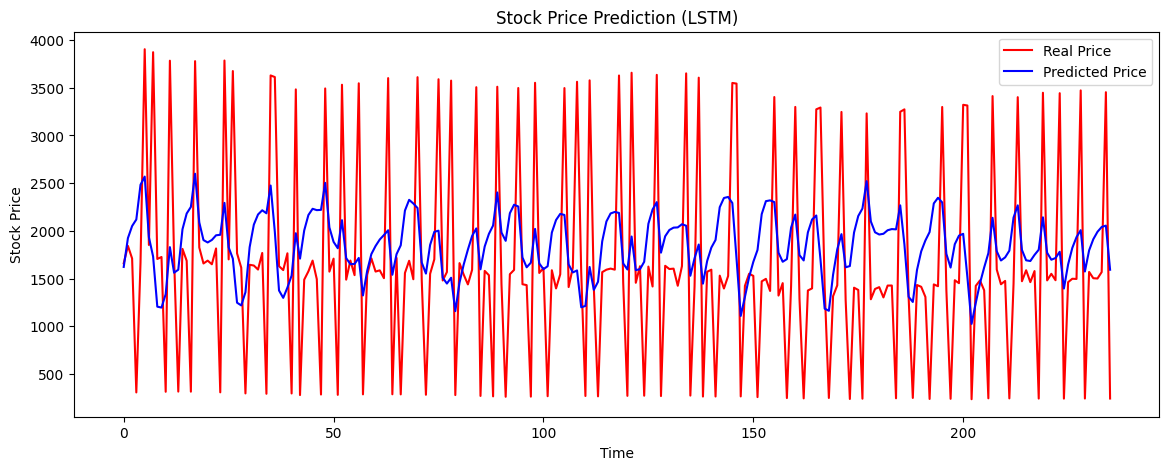

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


df = pd.read_csv("nm dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


data = df[['close']].values


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)


X = np.reshape(X, (X.shape[0], X.shape[1], 1))


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(14,5))
plt.plot(real_prices, color='red', label='Real Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.title('Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

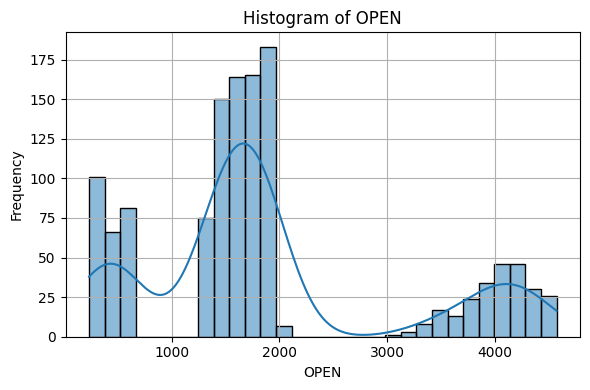

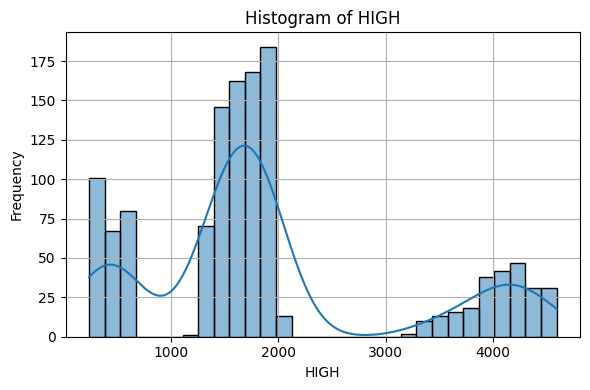

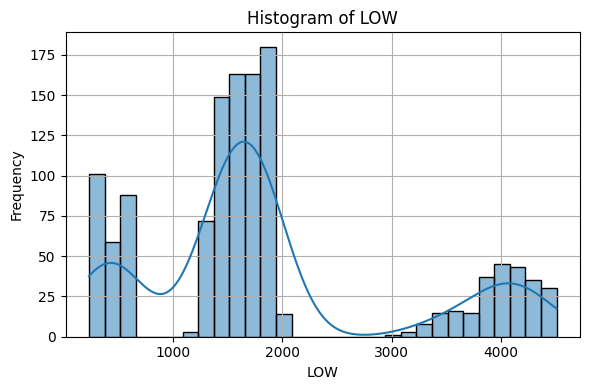

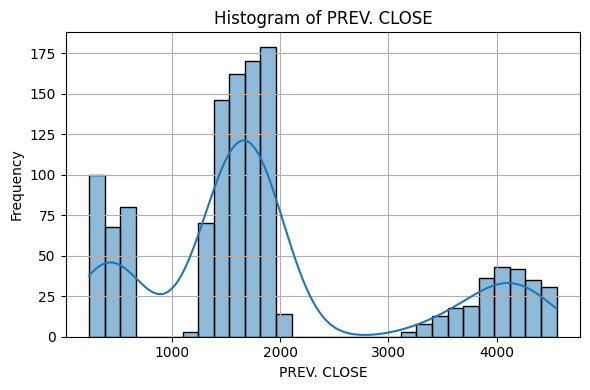

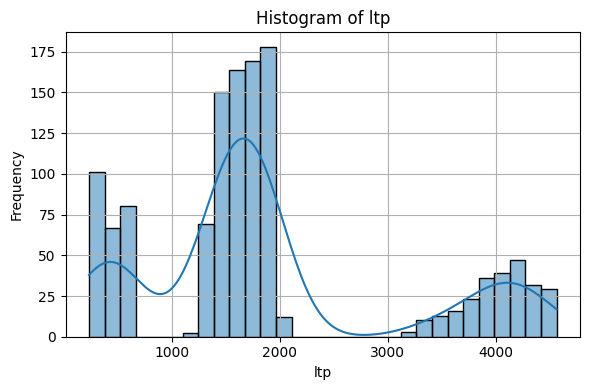

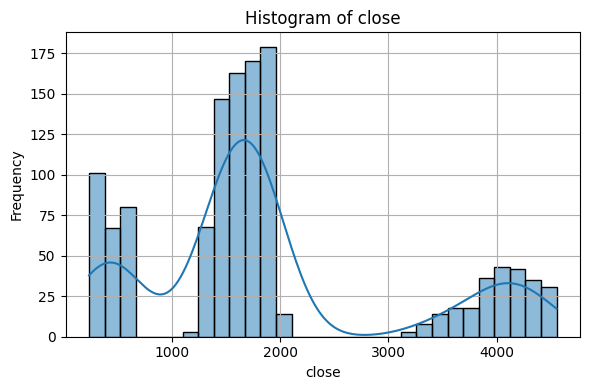

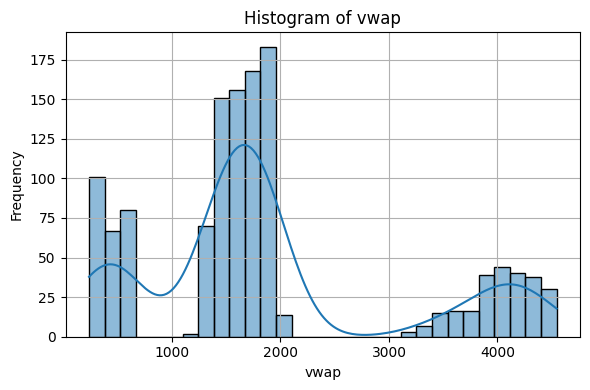

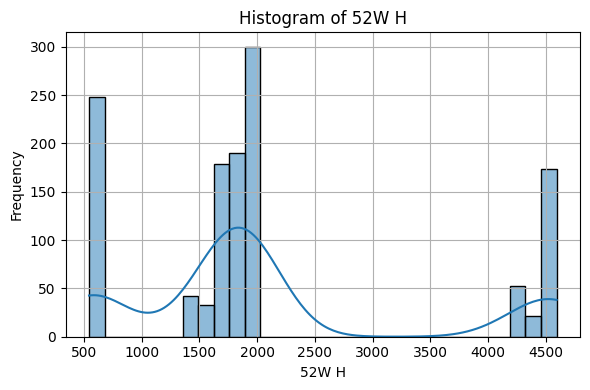

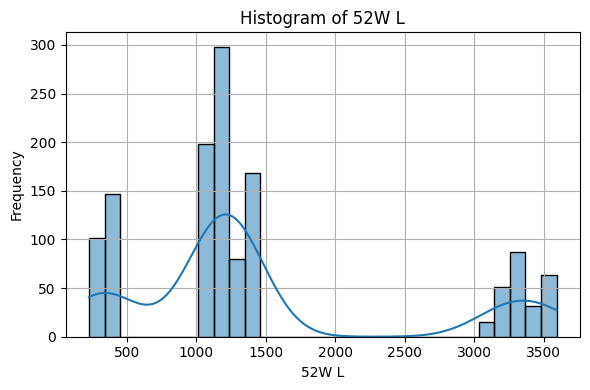

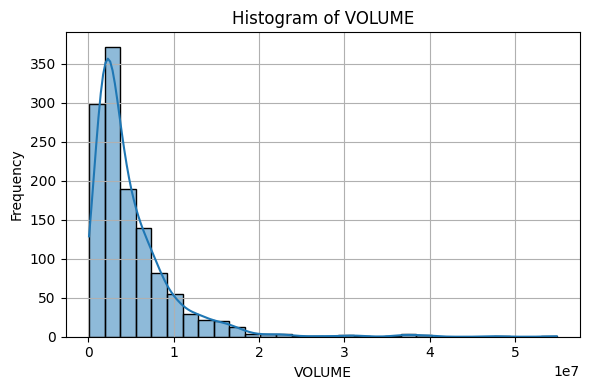

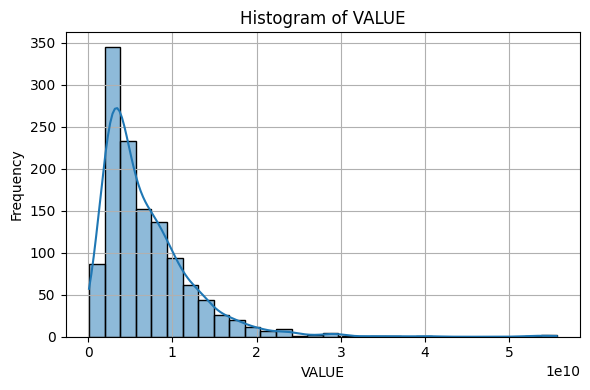

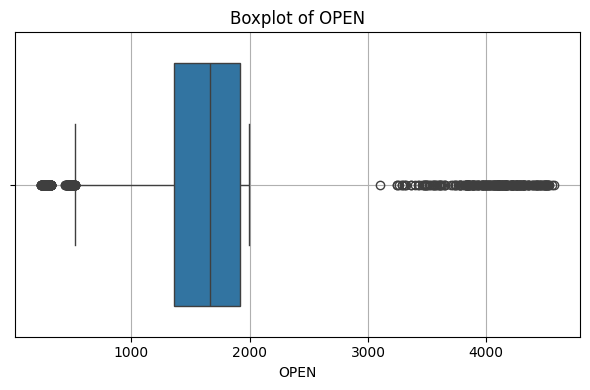

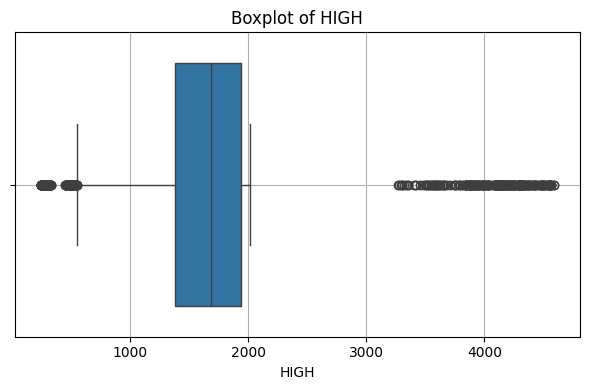

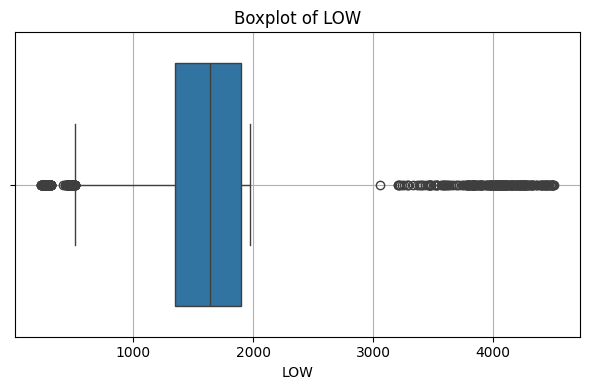

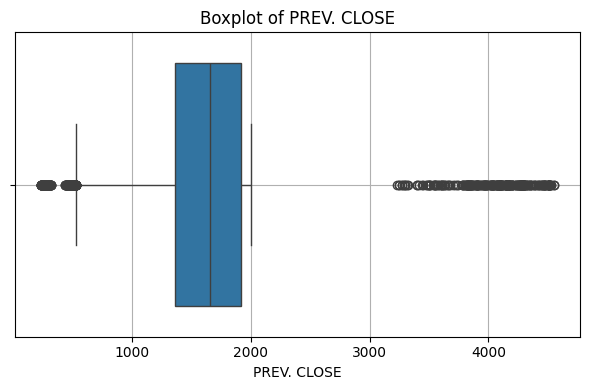

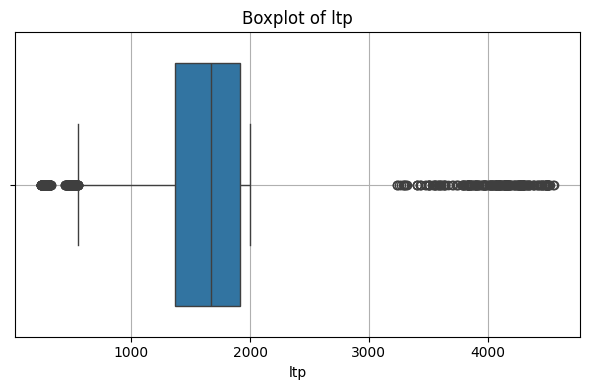

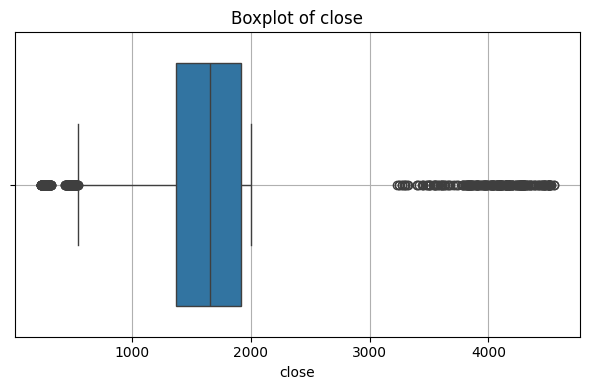

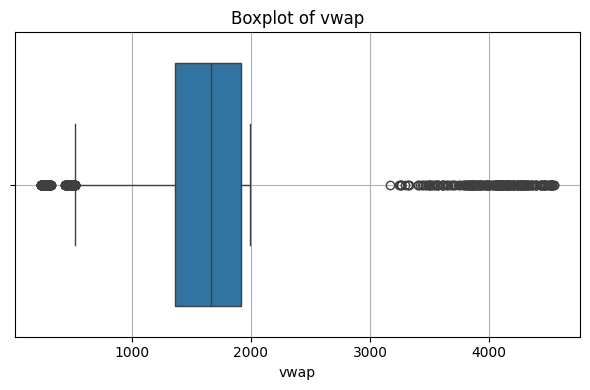

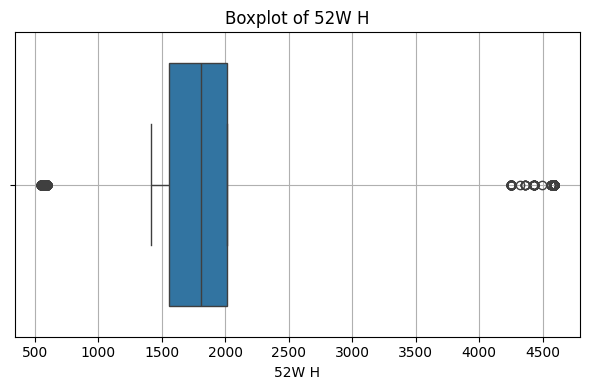

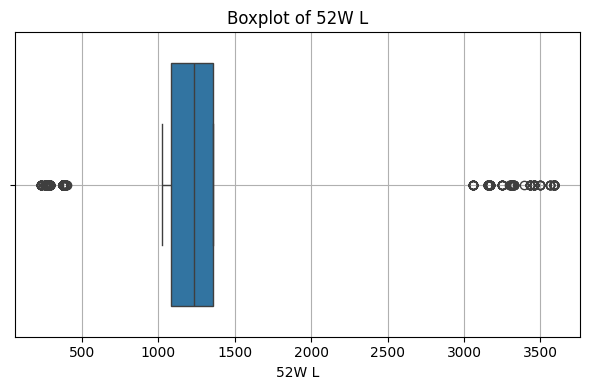

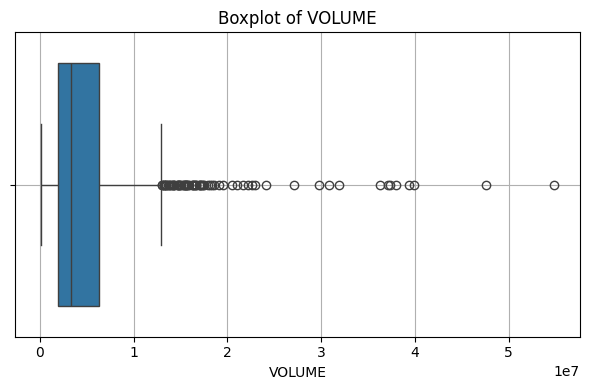

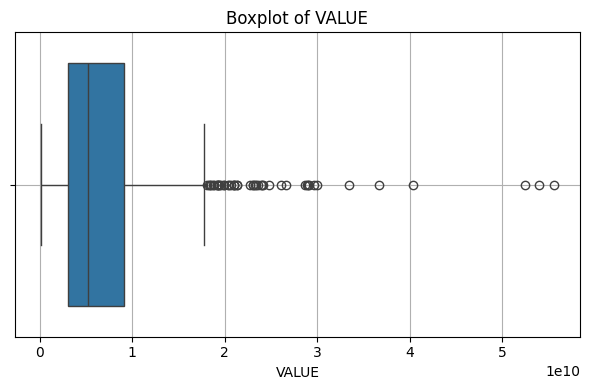

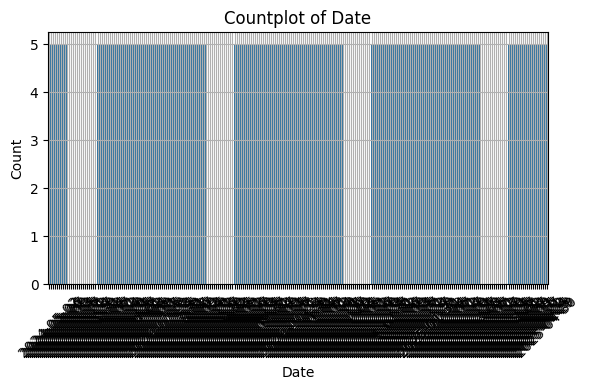

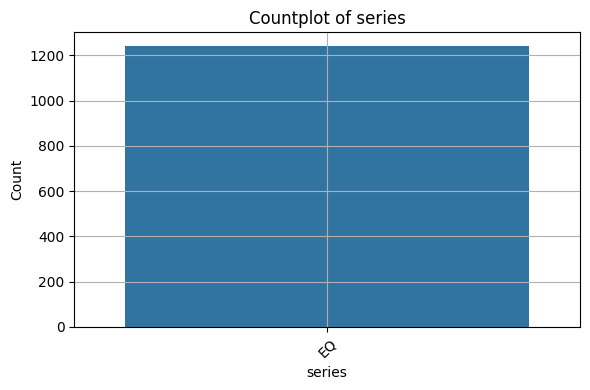

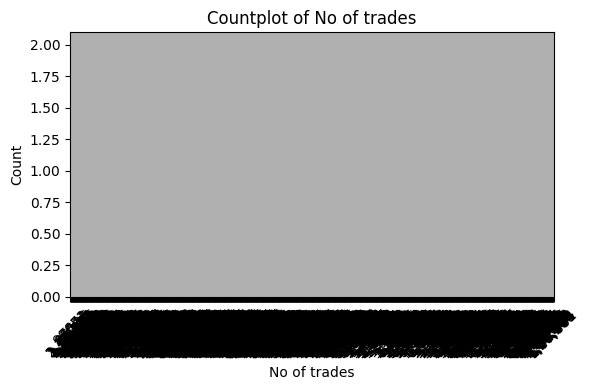

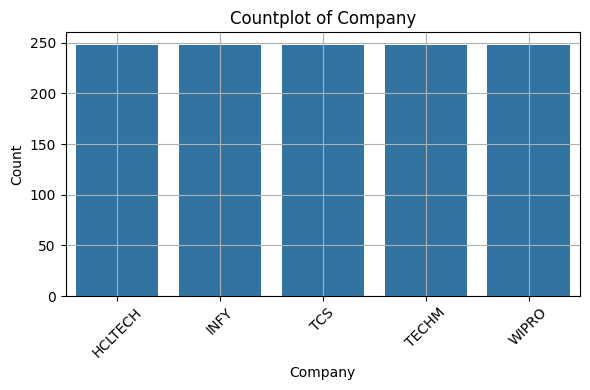

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("nm dataset.csv")


df.columns = df.columns.str.strip()


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


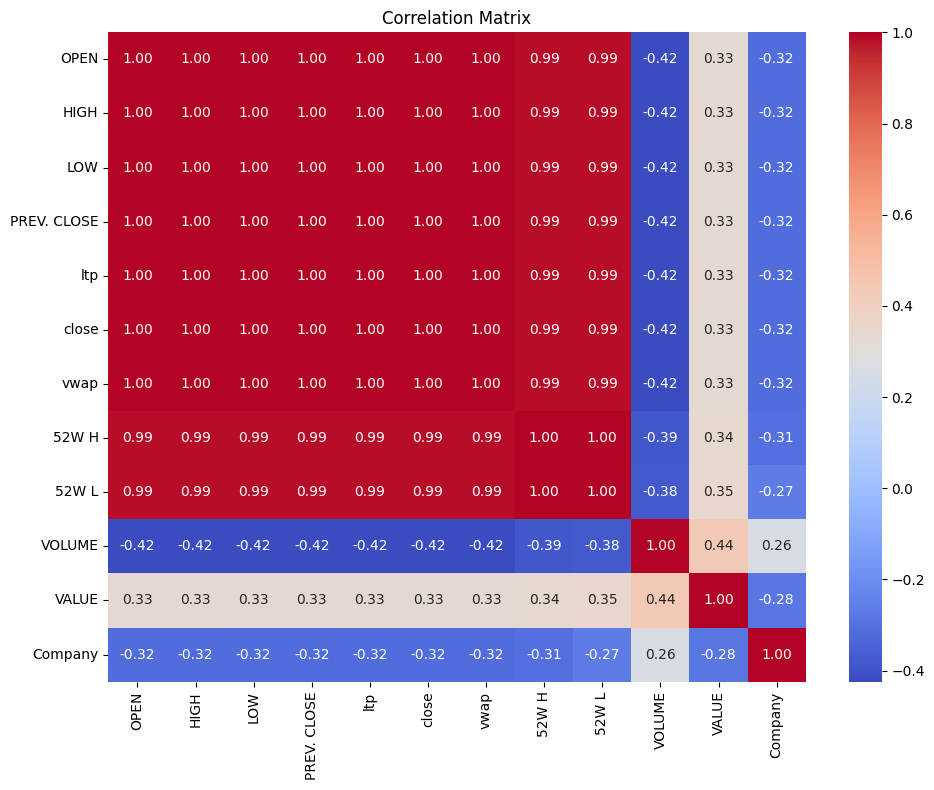

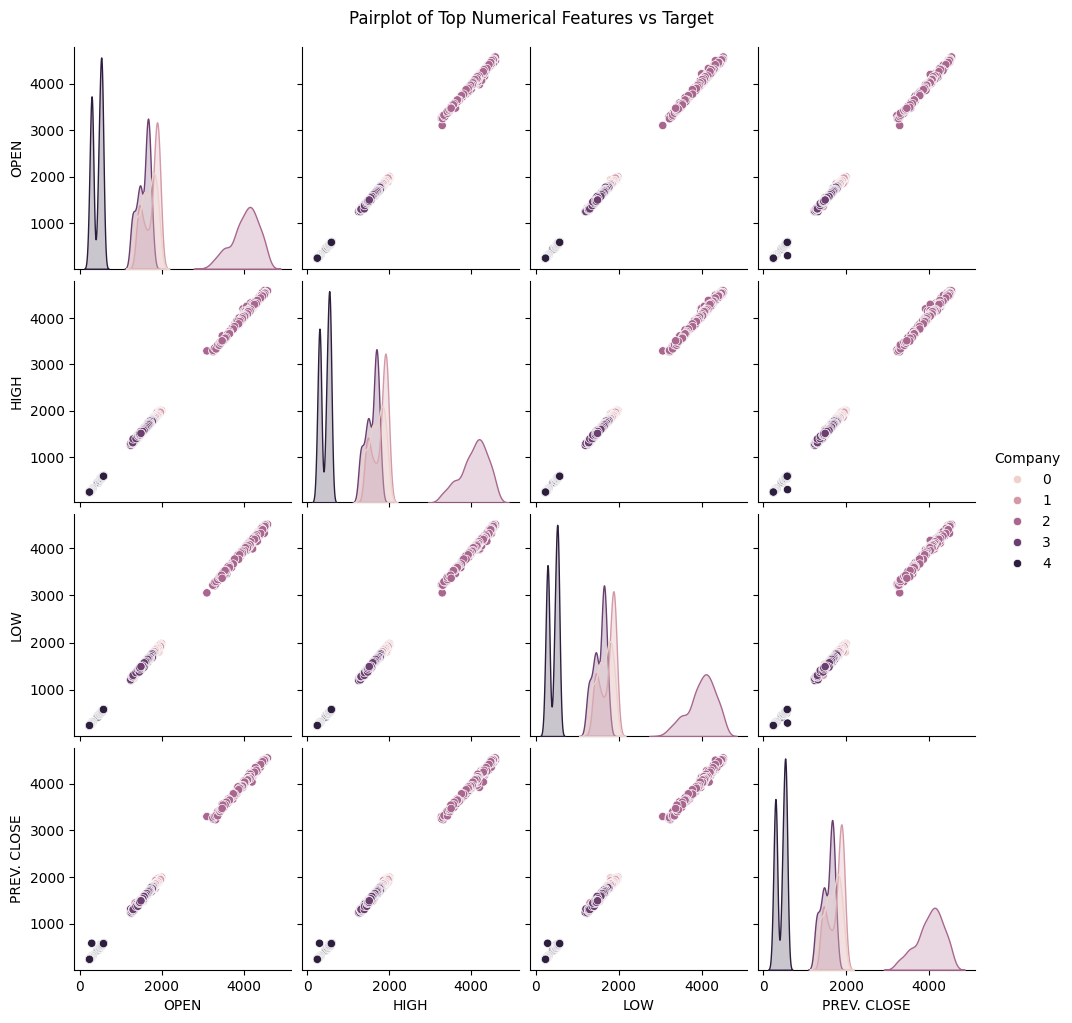

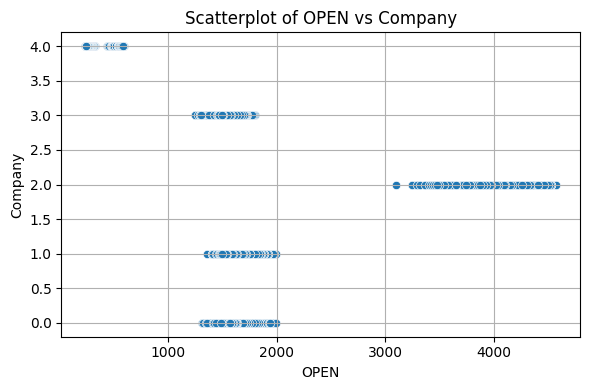

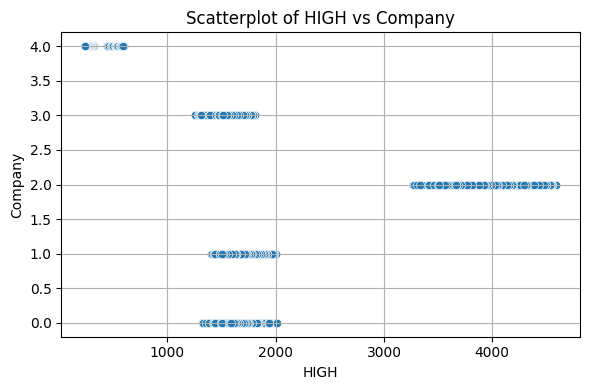

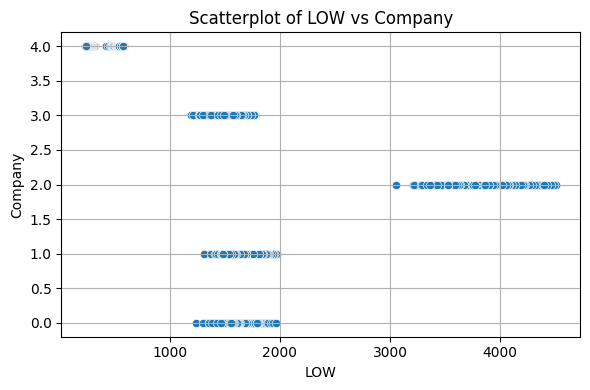

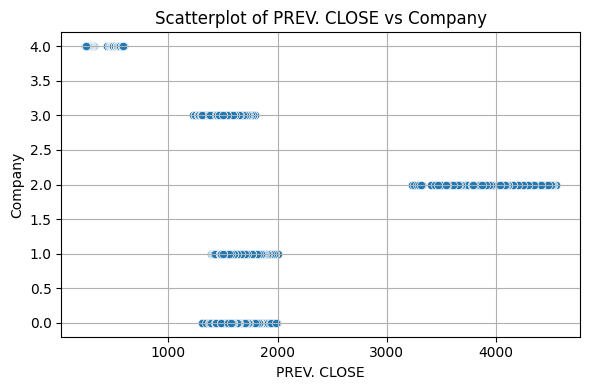

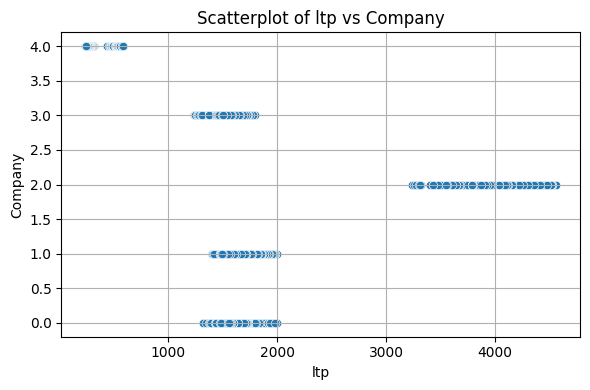

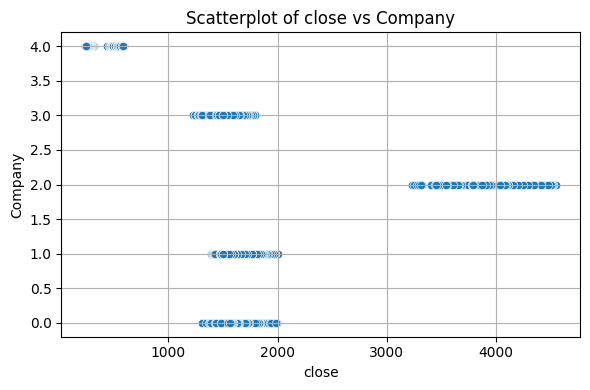

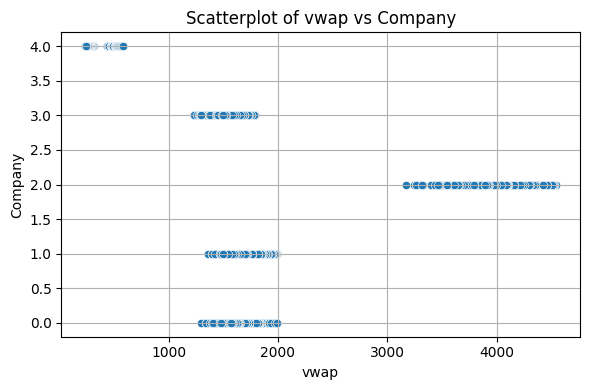

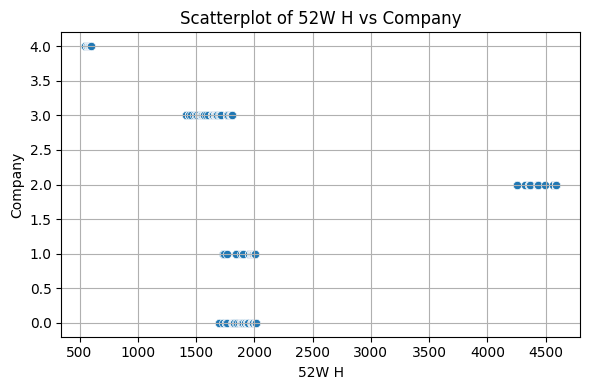

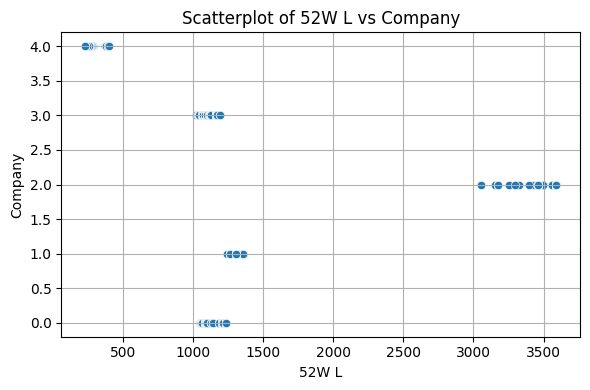

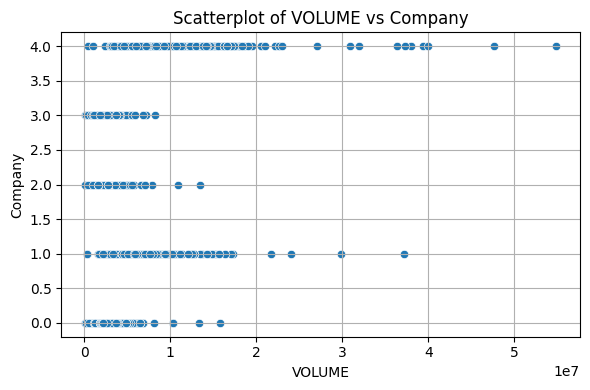

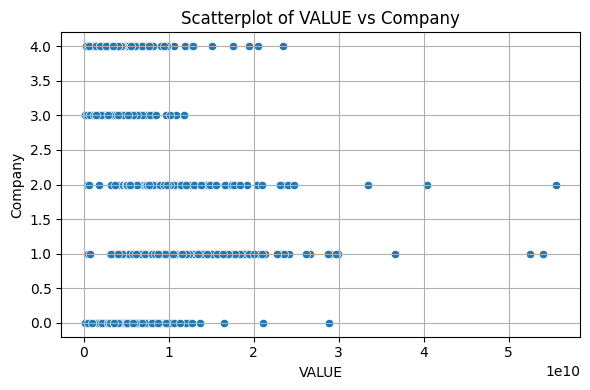

<ipython-input-13-99fb6483dd8d>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=mean_target_by_category, ci=None)


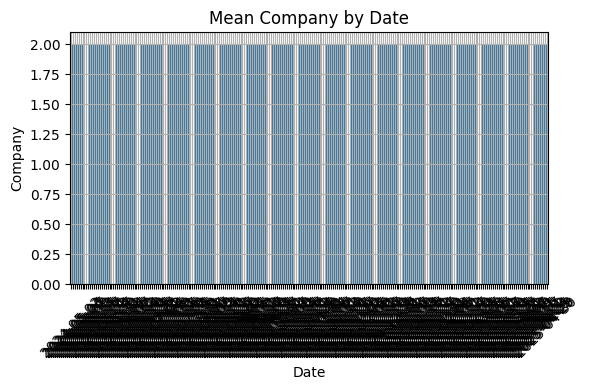

<ipython-input-13-99fb6483dd8d>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=mean_target_by_category, ci=None)


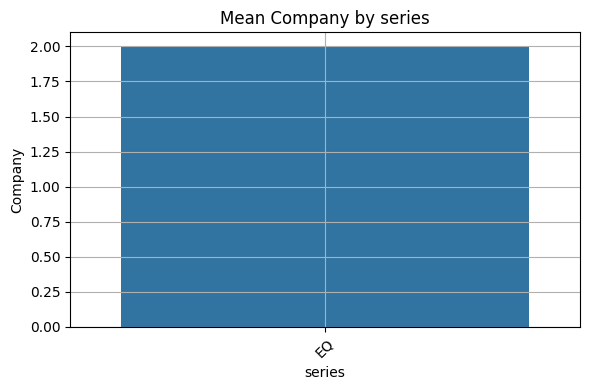

<ipython-input-13-99fb6483dd8d>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=mean_target_by_category, ci=None)


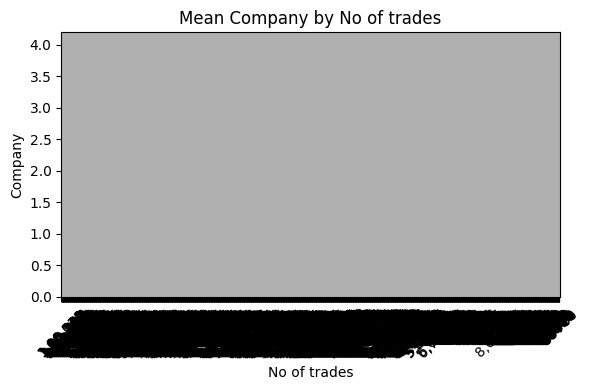

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("nm dataset.csv")
df.columns = df.columns.str.strip()

target_col = df.columns[-1]

if df[target_col].dtype == 'object':
    df[target_col] = pd.factorize(df[target_col])[0]

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(10, 8))

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


numerical_features_for_pairplot = df.select_dtypes(include=['int64', 'float64']).columns.drop(target_col, errors='ignore')

cols_for_pairplot = numerical_features_for_pairplot.tolist()[:4] + [target_col]

if len(cols_for_pairplot) > 1:
    sns.pairplot(df[cols_for_pairplot], hue=target_col)
    plt.suptitle("Pairplot of Top Numerical Features vs Target", y=1.02)
    plt.show()
else:
    print("Not enough numerical columns (excluding target) to create a pairplot of top features.")



for col in numerical_features_for_pairplot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df[target_col])
    plt.title(f'Scatterplot of {col} vs {target_col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if df[target_col].dtype in ['int64', 'float64']:
    for col in categorical_cols:
        if col in df.columns:
            plt.figure(figsize=(6, 4))
            mean_target_by_category = df.groupby(col)[target_col].mean().reset_index()
            sns.barplot(x=col, y=target_col, data=mean_target_by_category, ci=None)
            plt.title(f'Mean {target_col} by {col}')
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.tight_layout()
            plt.show()
else:
     print(f"Target column '{target_col}' is not numeric after encoding. Cannot create Grouped Bar Plots.")

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import joblib

# Load dataset
df = pd.read_csv("nm dataset.csv")
df.columns = df.columns.str.strip()

# Sort by date if available
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

# Focus on 'close' column for prediction
data = df['close'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Save scaler for deployment
joblib.dump(scaler, 'scaler.pkl')

# Create sequences for LSTM
sequence_length = 7
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.save("model.h5")
joblib.dump(scaler, "scaler.pkl")
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform predictions and true values to original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Regression metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print("Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: custom "accuracy" (e.g., prediction within 5% of actual)
tolerance = 0.05  # 5%
accuracy = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv) < tolerance)
print(f"Custom Accuracy (within 5% tolerance): {accuracy * 100:.2f}%")




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - loss: 0.1556 - val_loss: 0.0654
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0887 - val_loss: 0.0647
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0841 - val_loss: 0.0662
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0827 - val_loss: 0.0628
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0812 - val_loss: 0.0617
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0813 - val_loss: 0.0579
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0774 - val_loss: 0.0619
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0710 - val_loss: 0.0800
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0733 - val_loss: 0.0550
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0762 - val_loss: 0.0615


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Evaluation Metrics:
Mean Squared Error (MSE): 1147557.5473
Root Mean Squared Error (RMSE): 1071.2411
Mean Absolute Error (MAE): 925.3520
R² Score: -0.0196
Custom Accuracy (within 5% tolerance): 1.62%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("nm dataset.csv")

# Preprocess data
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
close_prices = df[['close']].values

# Normalize data
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

# Create sequences
sequence_length = 30
X, y = [], []
for i in range(len(scaled_close) - sequence_length):
    X.append(scaled_close[i:i+sequence_length])
    y.append(scaled_close[i+sequence_length])
X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-validation split
split = int(len(X) * 0.8)
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Additional layer
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

# Train model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=16, callbacks=[early_stopping], verbose=1)

# Evaluate model
y_pred = model.predict(X_val)
y_pred_inv = scaler.inverse_transform(y_pred)
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
r2 = r2_score(y_val_inv, y_pred_inv)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 160ms/step - loss: 0.0966 - val_loss: 0.0619
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0781 - val_loss: 0.0597
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0772 - val_loss: 0.0549
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0704 - val_loss: 0.0587
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.0727 - val_loss: 0.0511
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0652 - val_loss: 0.0669
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - loss: 0.0677 - val_loss: 0.0534
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0682 - val_loss: 0.0508
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 0.0689 - val_loss: 0.0507
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0675 - val_loss: 0.0549
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - loss: 0.0725 - val_loss: 0.0561
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/

In [2]:
! pip install gradio tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import gradio as gr
from tensorflow.keras.models import load_model
import joblib

# Load model and scaler
model = load_model("model.h5")
scaler = joblib.load("scaler.pkl")

# Define number of input days
SEQUENCE_LENGTH = 7

# Prediction function
def predict_price(*inputs):
    try:
        input_array = np.array(inputs).reshape(-1, 1)  # shape (7, 1)
        input_scaled = scaler.transform(input_array)
        lstm_input = input_scaled.reshape(1, SEQUENCE_LENGTH, 1)
        scaled_pred = model.predict(lstm_input)
        predicted_price = scaler.inverse_transform(scaled_pred)[0][0]
        return f"📈 Predicted Next Closing Price: ₹{predicted_price:.2f}"
    except Exception as e:
        return f"❌ Error: {str(e)}"

# Create 7 input fields for last 7 closing prices
inputs = [gr.Number(label=f"Day {i+1} Close") for i in range(SEQUENCE_LENGTH)]

# Launch Gradio app
gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs="text",
    title="📉 LSTM Stock Price Predictor (7-day input)",
    description="Enter the last 7 closing prices to predict the next day's stock closing price."
).launch(share=True)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)